# SRF AD: Preprocessing and Data Stats

## Preprocessing
Manual preprocessing included:
* filtering out non Swiss German audio
* check match between audio and subtitles

Preprocessing includes:
* matching subtitles with audio
* cutting audio and subtitles into subtitles units
* processing different subtitle formats (swiss vs. internation srt files)
* normaliziation of audio description
  

In [2]:
from datareader import prepare_srfad_data
import sys
sys.path.append('..')

AUDIO_PATH = '../data_raw/SRF_AD/audio_full_ad'
TEXT_PATH = '../data_raw/SRF_AD/subtitles'
PREPARED_PATH = '../data_prepared/srf_ad'

There was a mismatch between the names of audio files and subtitles. Going through them manually, resulted in the matching below.

In [3]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
    '1G100_305.wav': '1G100_308.CHDE.srt',
    '1G100_306.wav': '1G100_309.CHDE.srt',
    '1G100_307.wav': '1G100_305.CHDE.srt',
    '1G100_308.wav': '1G100_306.CHDE.srt',
    '1G100_309.wav': '1G100_307.CHDE.srt',
    '1G100_354.wav': '1G100_355.CHDE.srt',
    '1G100_355.wav': '1G100_354.CHDE.srt',
    '1G100_377.wav': '1G100_379.CHDE.srt',
    '1G100_378.wav': '1G100_377.CHDE.srt',
    '1G100_379.wav': '1G100_378.CHDE.srt',
}
prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files: 100%|██████████| 285/285 [00:12<00:00, 22.95it/s]


## Data Stats

### Stats of the entire dataset

In [4]:
from datareader import calculate_total_audio_stats

total_audio_min, avg_dur, durations = calculate_total_audio_stats(PREPARED_PATH)
print(f'Total audio duration: {total_audio_min} minutes')
print(f'Total audio duration: {total_audio_min/60} hours')
print(f'Average audio duration: {avg_dur} seconds')



Total audio duration: 2230.1452833333033 minutes
Total audio duration: 37.16908805555506 hours
Average audio duration: 0.050520927062802784 seconds


In [5]:
min_dur = min(durations)*60
max_dur = max(durations)*60
print(f'Minimum audio duration: {min_dur} seconds')
print(f'Maximum audio duration: {max_dur} seconds')


Minimum audio duration: 0.266 seconds
Maximum audio duration: 17.04 seconds


Text(0.5, 0, 'Duration in seconds')

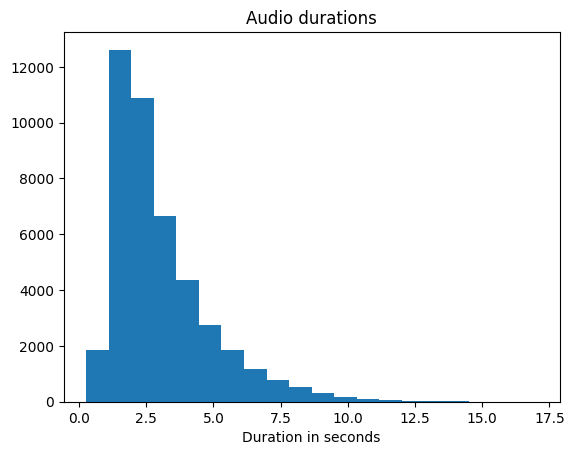

In [6]:
# plot durations as histogram in seconds
import matplotlib.pyplot as plt
durations_sec = [d*60 for d in durations]
plt.hist(durations_sec, bins=20)
plt.title('Audio durations')
plt.xlabel('Duration in seconds')

In [7]:
from datareader import get_token_stats, hist_plot
import os

token_stats = get_token_stats(PREPARED_PATH)

token_stats.describe()


KeyboardInterrupt: 

<Axes: title={'center': 'Number of tokens per audio'}, xlabel='Number of tokens', ylabel='Count'>

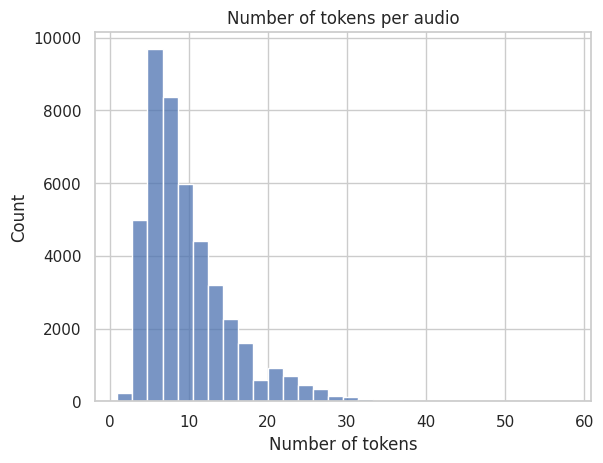

In [ ]:

hist_plot(token_stats, 'nr_token', 'Number of tokens per audio', 'Number of tokens', os.path.join(PREPARED_PATH, 'hist_tokens.png'))

### Stats of the split dataset

In [ ]:
from datareader import calculate_total_audio_stats
import pandas as pd
import os
import matplotlib.pyplot as plt

split_dir = '/home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad_split'

train_file = os.path.join(split_dir, 'train_srf_ad.txt')
val_file = os.path.join(split_dir, 'val_srf_ad.txt')
test_file = os.path.join(split_dir, 'test_srf_ad.txt')

def get_duration_plot(durations: list[str]):
    durations_sec = [d*60 for d in durations]
    plt.hist(durations_sec, bins=20)
    plt.title('Audio durations')
    plt.xlabel('Duration in seconds')

def get_stats(file: str):
    audio_file_paths = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            audio_file_paths.append(line.split('\t')[0])
    audio_files = [os.path.basename(file) for file in audio_file_paths]
    print(f'Number of audio files: {len(audio_files)}')
    total_audio_min, avg_dur, durations = calculate_total_audio_stats(PREPARED_PATH, audio_files)
    print(f'Total audio duration: {total_audio_min} minutes')
    print(f'Total audio duration: {total_audio_min/60} hours')
    print(f'Average audio duration: {avg_dur} seconds')
    return durations


#### Training split

Number of audio files: 35314
Total audio duration: 1785.9541666666553 minutes
Total audio duration: 29.765902777777587 hours
Average audio duration: 0.05057354495856191 seconds
35314


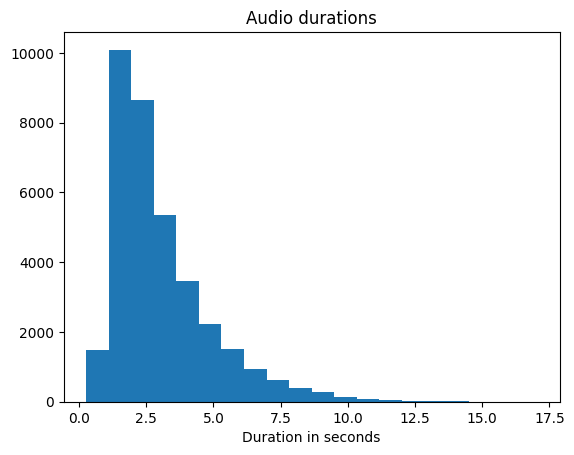

In [ ]:
durations = get_stats(train_file)
print(len(durations))
get_duration_plot(durations)

#### Validation split

Number of audio files: 4414
Total audio duration: 221.67785000000026 minutes
Total audio duration: 3.6946308333333375 hours
Average audio duration: 0.05022153375623024 seconds


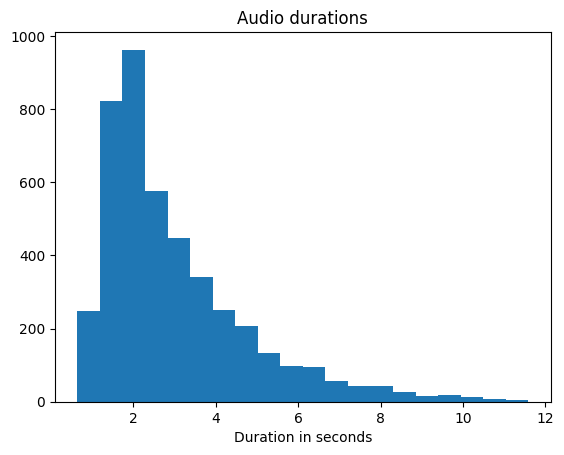

In [ ]:
durations = get_stats(val_file)
get_duration_plot(durations)

#### Test split

Number of audio files: 4415
Total audio duration: 222.5132666666672 minutes
Total audio duration: 3.708554444444453 hours
Average audio duration: 0.05039938089845237 seconds


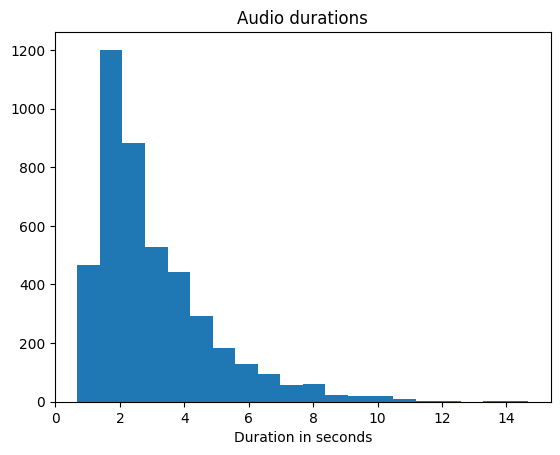

In [ ]:
durations = get_stats(test_file)
get_duration_plot(durations)

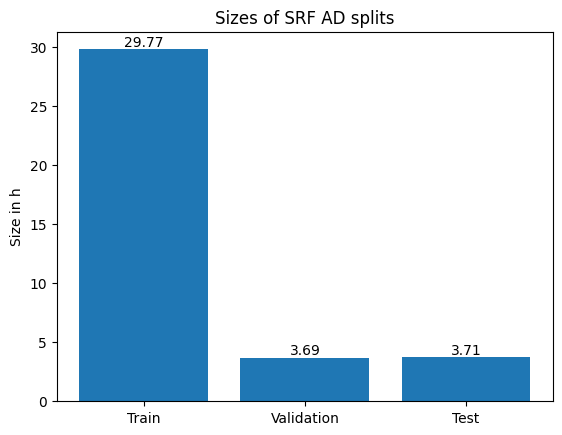

In [ ]:
sizes = [29.765902,3.694630,3.708554]
plot = plt.bar(['Train', 'Validation', 'Test'], sizes)
plt.ylabel('Size in h')
plt.title('Sizes of SRF AD splits')
# add label to bars
for rect in plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')
plt.show()

## Perculiarities
* very short subtitles
* white spaces only subtitles

In [ ]:
# print text with less than/equal to 2 tokens
short_texts = token_stats[token_stats['nr_token'] <= 2].text.to_list()
for t in short_texts:
    print(f'Text: {t}')

Text: D Mirjam
Text: De Jürg
Text: Zelia:
Text: E Türe
Text: Prost!
Text: D Carmela
Text: grinst
Text: Sagmähl stübt
Text: Dusse
Text: Undertitel:
Text: ?
Text: $E Langhaarigi
Text: «Die Bauernbrüder»
Text: Imene Salon
Text: Sie gestikuliert
Text: «Fabio Heim»
Text: 15
Text: Zum Jean-Pierre
Text: De Jonas
Text: Dusse.
Text: Dinne.
Text: Untertitel:
Text: Dinne:
Text: D Christa
Text: Dinne.
Text: Dusse.
Text: Dinne.
Text: kommt weg
Text: Caroline:
Text: srf.ch/1gegen100
Text: 30
Text: De Gempeler
Text: Der Hiufspfleger
Text: Jackie:
Text: e Filmplakat
Text: Der Uniformiert
Text: Sini Texttafle
Text: De Gaehwiler
Text: über 30
Text: Zwöi Rentier
Text: $Verusse
Text: Schrift:
Text: Vorusse.
Text: Kristine:
Text: über 30
Text: Vorusse.
Text: Felsspält.
Text: über 40
Text: 30
Text: über 30
Text: De lächlet
Text: Dusse.
Text: Dine.
Text: UTs??
Text: 10
Text: Kristine:
Text: 15
Text: uf 10
Text: über 50
Text: $E Blondierti
Text: Dusse.
Text: De Sanitäter
Text: De Emil
Text: Untertitel:
Text: 

Many seemingly white spaces only subtitles. Checke a couple manually and really seem to be empty:
* 287_169: AuD_2021_F02

> 169
> 00:38:21,400 --> 00:38:22,880

* 126_52: 1G100_290
> 52
> 00:14:30,680 --> 00:14:32,720


* 035_81: 1G100_305
> 81
> 00:42:20,240 --> 00:42:22,360



In [ ]:
token_stats[token_stats['nr_token'] <= 1]

,id,text,nr_token,nr_sentences,avg_tokens_per_sentence
1400,171_143,grinst,1,1,1.0
1475,134_104,Dusse,1,1,1.0
3846,200_29,15,1,1,1.0
6974,095_176,30,1,1,1.0
8376,121_160,$Verusse,1,1,1.0
10389,246_96,30,1,1,1.0
11248,200_28,10,1,1,1.0
11523,200_145,15,1,1,1.0
14444,200_160,10,1,1,1.0
16157,200_153,20,1,1,1.0


Map (num_proc=4):   2%|██▉                                                                                                                     | 87/3610 [00:08<05:27, 10.77 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_108_1G100_361.wav
Map (num_proc=4):   3%|███▎                                                                                                                    | 98/3610 [00:09<04:31, 12.93 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_81_1G100_361.wav
Map (num_proc=4):   3%|███▎                                                                                                                   | 102/3610 [00:09<03:43, 15.66 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_104_1G100_361.wav
Map (num_proc=4):   9%|██████████▋                                                                                                            | 323/3610 [00:29<05:30,  9.94 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_105_1G100_361.wav
Map (num_proc=4):  10%|████████████▍                                                                                                          | 378/3610 [00:34<04:50, 11.12 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_92_1G100_403.wav
Map (num_proc=4):  22%|█████████████████████████▋                                                                                             | 779/3610 [01:07<04:12, 11.22 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/060_62_1G100_289.wav
Map (num_proc=4):  27%|████████████████████████████████▏                                                                                      | 976/3610 [01:24<03:42, 11.86 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_77_1G100_361.wav
Map (num_proc=4):  46%|██████████████████████████████████████████████████████▋                                                               | 1673/3610 [02:37<03:59,  8.09 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_87_1G100_361.wav
Map (num_proc=4):  47%|███████████████████████████████████████████████████████▎                                                              | 1692/3610 [02:39<04:23,  7.27 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_104_1G100_403.wav
Map (num_proc=4):  47%|███████████████████████████████████████████████████████▋                                                              | 1703/3610 [02:40<03:30,  9.05 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_93_1G100_361.wav
Map (num_proc=4):  51%|████████████████████████████████████████████████████████████▌                                                         | 1852/3610 [02:55<02:38, 11.11 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_101_1G100_403.wav
Map (num_proc=4):  60%|███████████████████████████████████████████████████████████████████████▏                                              | 2179/3610 [03:26<02:21, 10.11 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_125_1G100_403.wav
Map (num_proc=4):  63%|██████████████████████████████████████████████████████████████████████████▌                                           | 2280/3610 [03:34<01:49, 12.17 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_75_1G100_361.wav
Map (num_proc=4):  73%|█████████████████████████████████████████████████████████████████████████████████████▊                                | 2625/3610 [04:05<01:32, 10.66 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_111_1G100_403.wav
Map (num_proc=4):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 3034/3610 [04:41<00:46, 12.35 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/132_163_Blaulichtgeschichten_01.wav
Map (num_proc=4):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 3299/3610 [05:07<00:30, 10.24 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_109_1G100_403.wav
Map (num_proc=4):  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 3499/3610 [05:28<00:13,  8.12 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/132_169_Blaulichtgeschichten_01.wav
Map (num_proc=4): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3610/3610 [05:37<00:00, 10.69 examples/s]


En Globus rotiert und kunnt nöcher. D Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Radschada. (Cala Rajada) --> En Globus rotiert und kunnt nöcher. D Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Radschada. Cala Rajada


(ÜBER DIALOG UNDEUTL.) Die vier schüttled enand d Händ. --> ÜBER DIALOG UNDEUTL. Die vier schüttled enand d Händ.


D Caroline und de Rolli sitzed ... ("hanis Gfühl") ... unterme Pavillon. --> D Caroline und de Rolli sitzed ... "hanis Gfühl" ... unterme Pavillon.

$$ D Mona ... ("Ou, merci.") ... bringt em z Trinke. --> D Mona ... "Ou, merci." ... bringt em z Trinke.



#### Particularities of audio description

* Sometimes the audio is audio description only or also the entire audio of the show
* Sometimes there is even swiss german speech in the background --> with some samples not even in the background, but there are breaks where the background becomes louder again
  > $$ D Mona ... ("Ou, merci.") ... bringt em z Trinke. --> D Mona ... "Ou, merci." ... bringt em z Trinke.
* Also subtitles are read out --> Often times in high German, could be found in subtitles due to " but the timestamps would need to be adjusted to
  >  "Das ist meine Frau! Nicht deine." De Fernando und di Schlank gönd.
* Annotations by the reader:
    > D Fraue laufed zume (Chies-)Garte. -> unclear whether Chies was said in the end (need to check audio)
    $$ Si schüttlet de Chopf. ("Nz" fast nicht hörbar) -->  Si schüttlet de Chopf. "Nz" fast nicht hörbar
* Descriptions of the audio
    > Mitem Gummring vor sich ... (brumm) ... fahret alli hinterenand her. --> Mitem Gummring vor sich brumm fahret alli hinterenand her.